## INTRODUCTION
In this analysis, I used the Groceries dataset, which has 38765 rows of the purchase orders of people from grocery stores. After I prepared the data I have been analysed the dataset with visualizations and performed association rules mining with the Apriori algorithm

In [51]:
# Import 'pandas' for working with data frames
import pandas as pd

# Import 'matplotlib.pyplot' and 'seaborn' for working with data frames
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import 'apriori' and 'association_rules' from 'mlxtend'
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.filterwarnings('ignore')

In [52]:
# Load the data and take a look at it
# Note: The data needs to be in binary matrix format
df1 = pd.read_csv('C:/Users/ammanana/Desktop/Groceries_dataset.csv')
df1.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [54]:
df1.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [55]:
# spliting date column by day,month and year

spliting = df1['Date'].str.split(pat='-',expand=True)

In [56]:
## splitted column are naming as day,month and year
df1['Day'] = spliting[0]
df1['month'] = spliting[1]
df1['year'] = spliting[2]

In [57]:
df1.head()

,Member_number,Date,itemDescription,Day,month,year
0,1808,21-07-2015,tropical fruit,21,07,2015
1,2552,05-01-2015,whole milk,05,01,2015
2,2300,19-09-2015,pip fruit,19,09,2015
3,1187,12-12-2015,other vegetables,12,12,2015
4,3037,01-02-2015,whole milk,01,02,2015


In [58]:
look_up = {'01':'Jan','02':'Feb','03':'Mar','04':'Apr','05':'May','06':'Jun','07':'Jul',
          '08':'Aug','09':'Sep','10':'Oct','11':'Nov','12':'Dec'}

df1['month'] = df1['month'].apply(lambda x: look_up[x])

In [59]:
df1.head()

,Member_number,Date,itemDescription,Day,month,year
0,1808,21-07-2015,tropical fruit,21,Jul,2015
1,2552,05-01-2015,whole milk,05,Jan,2015
2,2300,19-09-2015,pip fruit,19,Sep,2015
3,1187,12-12-2015,other vegetables,12,Dec,2015
4,3037,01-02-2015,whole milk,01,Feb,2015


In [60]:
from datetime import datetime

date_format = '%d-%m-%Y'

df1['Date'] = pd.to_datetime(df1['Date'], format=date_format)
df1['day_of_week'] = df1['Date'].dt.strftime('%A')

In [61]:
df1.head()

,Member_number,Date,itemDescription,Day,month,year,day_of_week
0,1808,2015-07-21,tropical fruit,21,Jul,2015,Tuesday
1,2552,2015-01-05,whole milk,05,Jan,2015,Monday
2,2300,2015-09-19,pip fruit,19,Sep,2015,Saturday
3,1187,2015-12-12,other vegetables,12,Dec,2015,Saturday
4,3037,2015-02-01,whole milk,01,Feb,2015,Sunday


In [62]:
df1.describe(include='all')

,Member_number,Date,itemDescription,Day,month,year,day_of_week
count,38765.000000,38765,38765,38765,38765,38765,38765
unique,NaN,728,167,31,12,2,7
top,NaN,2015-01-21 00:00:00,whole milk,03,Aug,2015,Thursday
freq,NaN,96,2502,1393,3496,20488,5620
first,NaN,2014-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,3003.641868,NaN,NaN,NaN,NaN,NaN,NaN
std,1153.611031,NaN,NaN,NaN,NaN,NaN,NaN
min,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2002.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
## freq items that bought

freq_items = df1['itemDescription'].value_counts()
freq_items

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

In [64]:
# plot a bar chart to see the top sold items
fig = px.bar(data_frame = freq_items.head(20), title ='Top 20 Items', text_auto ='.3s',
                 labels = {
                     "index": "Items",
                     "values": "Quantity",
                     'lift': 'Lift'
                 })
fig.update_layout(title_x = 0.5, title_y = 0.86)
fig.show()

- Milk, Bakery items, vegetables, fruits and drinks are the top items from the store.

In [65]:
## sales product by year
df1.groupby(['year'])['itemDescription'].count().reset_index()

,year,itemDescription
0,2014,18277
1,2015,20488


- 2015 has more sales than the 2014

In [66]:
## total sales by month

datamonth = df1.groupby(['year','month'])['itemDescription'].count().reset_index()
datamonth.rename(columns = {'itemDescription':'Quantity'},inplace=True)
datamonth

,year,month,Quantity
0,2014,Apr,1561
1,2014,Aug,1575
2,2014,Dec,1473
3,2014,Feb,1437
4,2014,Jan,1527
5,2014,Jul,1576
6,2014,Jun,1570
7,2014,Mar,1411
8,2014,May,1615
9,2014,Nov,1469


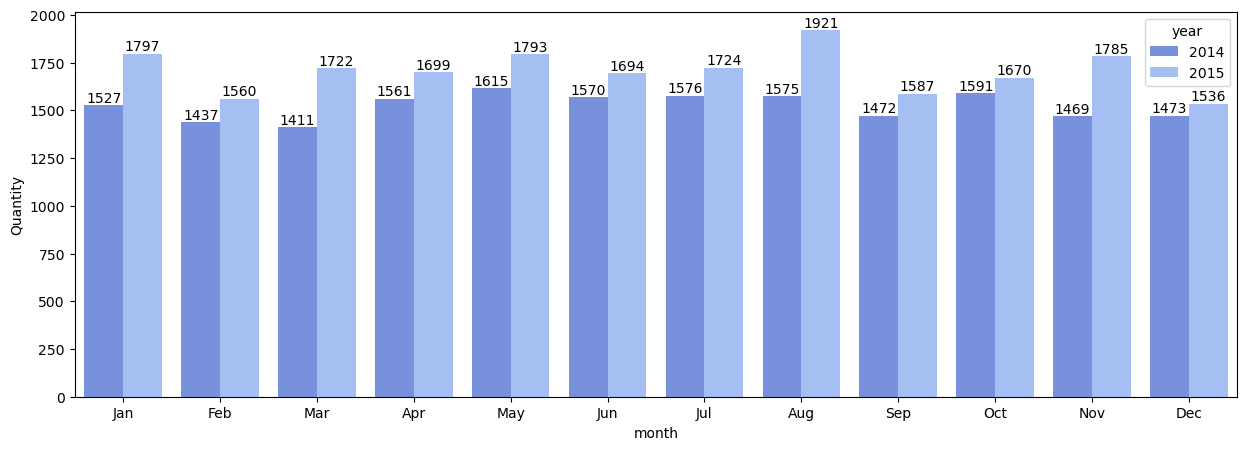

In [67]:
# Total product sales by Months

plt.figure(figsize = (15, 5))
from pandas.api.types import CategoricalDtype
months_ordered = CategoricalDtype(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
datamonth['month'] = datamonth['month'].astype(months_ordered)
datamonth = datamonth.sort_values(by = 'month')

colors = sns.color_palette("coolwarm")
ax = sns.barplot(x = 'month', y = 'Quantity', data = datamonth, hue = 'year', palette = colors)
for i in ax.containers:
     ax.bar_label(i)
plt.show()  

- May was the month with the highest sales in 2014, and August was the month with the highest sales in 2015.

### Data preparation for market basket analysis

In [68]:
df1.head()

,Member_number,Date,itemDescription,Day,month,year,day_of_week
0,1808,2015-07-21,tropical fruit,21,Jul,2015,Tuesday
1,2552,2015-01-05,whole milk,05,Jan,2015,Monday
2,2300,2015-09-19,pip fruit,19,Sep,2015,Saturday
3,1187,2015-12-12,other vegetables,12,Dec,2015,Saturday
4,3037,2015-02-01,whole milk,01,Feb,2015,Sunday


In [69]:
df1['Member_number'] = df1['Member_number'].astype('str')
df1['itemDescription'] = df1['itemDescription'].str.strip()

In [70]:
df1.head()

,Member_number,Date,itemDescription,Day,month,year,day_of_week
0,1808,2015-07-21,tropical fruit,21,Jul,2015,Tuesday
1,2552,2015-01-05,whole milk,05,Jan,2015,Monday
2,2300,2015-09-19,pip fruit,19,Sep,2015,Saturday
3,1187,2015-12-12,other vegetables,12,Dec,2015,Saturday
4,3037,2015-02-01,whole milk,01,Feb,2015,Sunday


In [71]:
df1.shape

(38765, 7)

In [72]:
#create the matrix

basket = (df1.groupby(['Member_number','itemDescription'])['itemDescription'].count().unstack().fillna(0).reset_index())
basket

itemDescription,Member_number,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
2,1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3894,4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3895,4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3896,4999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [73]:
basket = basket.drop(columns="Member_number")

In [74]:
basket.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [75]:
##some values are 2 we have encode to 0 and 1
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

basket_sets.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Building Association Rules

You will need a call to two functions:
- The first will identify *frequent itemsets*, in other words, sets that meet a specified support threshold
- The second will build *association rules* that meet a specified lift (alternatively, confidence) threshold

Note that there may be no rules that meet the specified threshold. In this case, the threshold value will need to be reduced. 

In [76]:
# Obtain frequent itemsets for the data using the 'apriori' method
frequent_items = apriori(basket_sets,min_support=0.01,use_colnames=True)

In [77]:
# Generate associate rules for the frequent items using the 'association_rules' method for the default metric and threshold
# Note: The default metric is 'confidence' and the default threshold is 0.8
rules = association_rules(frequent_items)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [78]:
# Generate associate rules for the frequent items using the 'association_rules' method for 'lift' with threshold 1.5
rules = association_rules(frequent_items, metric = 'lift', min_threshold = 1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(beef),(UHT-milk),0.119548,0.078502,0.010518,0.087983,1.120775,0.001133,1.010396,0.122392
1,(UHT-milk),(beef),0.078502,0.119548,0.010518,0.133987,1.120775,0.001133,1.016672,0.116940
2,(UHT-milk),(bottled beer),0.078502,0.158799,0.014879,0.189542,1.193597,0.002413,1.037933,0.176014
3,(bottled beer),(UHT-milk),0.158799,0.078502,0.014879,0.093700,1.193597,0.002413,1.016769,0.192815
4,(UHT-milk),(bottled water),0.078502,0.213699,0.021293,0.271242,1.269268,0.004517,1.078960,0.230217


In [79]:
# Look at the basic summary statistics of the rules
# The first column will be the count or number of rules that meet the thresholds
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
count,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000,15260.000000
mean,0.152273,0.152273,0.016595,0.197921,1.323384,0.003571,1.073858,0.276515
std,0.124400,0.124400,0.010440,0.159154,0.184848,0.001903,0.101136,0.120168
min,0.013084,0.013084,0.010005,0.021837,1.000144,0.000003,1.000023,0.000167
25%,0.054643,0.054643,0.011288,0.071839,1.191495,0.002332,1.014811,0.189719
50%,0.114931,0.114931,0.013340,0.148230,1.292869,0.003328,1.036628,0.269472
75%,0.213699,0.213699,0.017958,0.273810,1.421507,0.004462,1.088853,0.356979
max,0.458184,0.458184,0.191380,0.784314,2.428689,0.020940,2.512057,0.767448


# Subsetting Rules Based on Criteria
We can zero in on rules that meet user-specified criteria, such as lift, confidence or support

In [95]:
rules[(rules['lift'] >= 2) & (rules['confidence'] >= 0.35)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len,consequent_len,maxlen
15154,"(rolls/buns, yogurt, bottled water)","(other vegetables, whole milk)",0.026424,0.191380,0.010518,0.398058,2.079934,0.005461,1.343352,0.533308,3,2,5
15210,"(rolls/buns, yogurt, shopping bags)","(other vegetables, whole milk)",0.025141,0.191380,0.010005,0.397959,2.079417,0.005194,1.343131,0.532483,3,2,5
15177,"(other vegetables, sausage, yogurt)","(rolls/buns, whole milk)",0.037199,0.178553,0.013597,0.365517,2.047107,0.006955,1.294672,0.531268,3,2,5
13048,"(other vegetables, frozen meals)","(rolls/buns, whole milk)",0.027707,0.178553,0.010005,0.361111,2.022430,0.005058,1.285743,0.519951,2,2,4


- After applying a lift greater than 2 and confidence interval greater than 35% . I found consequent support greater than 17%.we see
  the itemsets (rolls/buns,yogurt,bottled water) and (other vegetables, whole milk) have the highest lift greater than 2.07.(rolls/buns, yogurt, shopping bags) and (other vegetables, whole milk),
  (other vegetables, sausage, yogurt) and (rolls/buns, whole milk), (other vegetables, frozen meals) and (rolls/buns, whole milk) have higher lift and there confidence is in greater than 35%. The people 
   who came for roll/buns, other vegetables are also preffaring for buying whole milk also.

# Sorting Rules

In [88]:
rules.sort_values(by = ['lift'], inplace = True, ascending = False)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
15175,"(other vegetables, sausage, whole milk)","(rolls/buns, yogurt)",0.050282,0.111339,0.013597,0.270408,2.428689,0.007998,1.218025,0.619400
15194,"(rolls/buns, yogurt)","(other vegetables, sausage, whole milk)",0.111339,0.050282,0.013597,0.122120,2.428689,0.007998,1.081831,0.661957
15180,"(other vegetables, rolls/buns, yogurt)","(sausage, whole milk)",0.052335,0.106978,0.013597,0.259804,2.428575,0.007998,1.206467,0.620721
15189,"(sausage, whole milk)","(other vegetables, rolls/buns, yogurt)",0.106978,0.052335,0.013597,0.127098,2.428575,0.007998,1.085650,0.658702
12800,"(sausage, whole milk)","(curd, yogurt)",0.106978,0.040277,0.010005,0.093525,2.322046,0.005696,1.058742,0.637549
12797,"(curd, yogurt)","(sausage, whole milk)",0.040277,0.106978,0.010005,0.248408,2.322046,0.005696,1.188173,0.593239
15188,"(other vegetables, yogurt)","(rolls/buns, sausage, whole milk)",0.120318,0.048743,0.013597,0.113006,2.318415,0.007732,1.072451,0.646451
15181,"(rolls/buns, sausage, whole milk)","(other vegetables, yogurt)",0.048743,0.120318,0.013597,0.278947,2.318415,0.007732,1.219997,0.597810
15179,"(other vegetables, yogurt, whole milk)","(rolls/buns, sausage)",0.071832,0.082350,0.013597,0.189286,2.298554,0.007681,1.131903,0.608665
15190,"(rolls/buns, sausage)","(other vegetables, yogurt, whole milk)",0.082350,0.071832,0.013597,0.165109,2.298554,0.007681,1.111724,0.615642


- (other vegetables, sausage, whole milk) and (rolls/buns, yogurt), (rolls/buns, yogurt) and (other vegetables, sausage, whole milk),(other vegetables, rolls/buns, yogurt) and (sausage, whole milk) have higher lift greater than 2.

In [96]:
rules_sorted2 = rules[(rules['lift'] > 1) & (rules['confidence'] >= 0.70) ].sort_values(by='lift', ascending=False).reset_index(drop=True) 
rules_sorted2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len,consequent_len,maxlen
0,"(meat, domestic eggs)",(whole milk),0.013084,0.458184,0.010262,0.784314,1.711789,0.004267,2.512057,0.421328,2,1,3
1,"(fruit/vegetable juice, chocolate)",(whole milk),0.014366,0.458184,0.010775,0.750000,1.636898,0.004192,2.167265,0.394760,2,1,3
2,"(other vegetables, rolls/buns, yogurt, bottled...",(whole milk),0.014110,0.458184,0.010518,0.745455,1.626978,0.004053,2.128564,0.390879,4,1,5
3,"(yogurt, pip fruit, bottled water)",(whole milk),0.013853,0.458184,0.010262,0.740741,1.616689,0.003914,2.089863,0.386811,3,1,4
4,"(rolls/buns, yogurt, brown bread)",(whole milk),0.017445,0.458184,0.012827,0.735294,1.604802,0.004834,2.046862,0.383561,3,1,4
5,"(other vegetables, bottled water, brown bread)",(whole milk),0.016675,0.458184,0.012057,0.723077,1.578138,0.004417,1.956559,0.372554,3,1,4
6,"(rolls/buns, yogurt, bottled beer)",(whole milk),0.019241,0.458184,0.013853,0.720000,1.571422,0.005038,1.935058,0.370768,3,1,4
7,"(soda, curd, yogurt)",(whole milk),0.015136,0.458184,0.010775,0.711864,1.553666,0.003840,1.880421,0.361838,3,1,4
8,"(other vegetables, rolls/buns, yogurt, shoppin...",(whole milk),0.014110,0.458184,0.010005,0.709091,1.547613,0.003540,1.862494,0.358908,4,1,5
9,"(yogurt, pip fruit, pastry)",(whole milk),0.014879,0.458184,0.010518,0.706897,1.542823,0.003701,1.848550,0.357152,3,1,4


- After applying a lift filter greater than 1 and confidence greater than or equal to 70%, I found ten rules with consequent support higher than 45%. We see that itemsets (meat, domestic eggs) and (whole milk) have the highest lift. That means that once we know that a customer has bought meat and domestic eggs, it becomes 1.7 times more likely that he will also buy whole milk. Analyzing the consequent items, we can see that it is possible to leverage even more sales of whole milk through recommendations.

In [89]:
# Obtain the lengths of the antecedents and consequents, and the rules themselves
rules['antecedent_len'] = rules['antecedents'].apply(lambda x: len(x))
rules['consequent_len'] = rules['consequents'].apply(lambda x: len(x))
rules['maxlen'] = rules['antecedent_len'] + rules['consequent_len']

In [97]:
# Now you can specify an antecedent length, a consequent length, both, or the length of the rule
rules[(rules['maxlen'] >= 2) & (rules['confidence'] > 0.7) & (rules['lift'] > 1.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len,consequent_len,maxlen
7020,"(meat, domestic eggs)",(whole milk),0.013084,0.458184,0.010262,0.784314,1.711789,0.004267,2.512057,0.421328,2,1,3
5708,"(fruit/vegetable juice, chocolate)",(whole milk),0.014366,0.458184,0.010775,0.750000,1.636898,0.004192,2.167265,0.394760,2,1,3
15143,"(other vegetables, rolls/buns, yogurt, bottled...",(whole milk),0.014110,0.458184,0.010518,0.745455,1.626978,0.004053,2.128564,0.390879,4,1,5
11630,"(yogurt, pip fruit, bottled water)",(whole milk),0.013853,0.458184,0.010262,0.740741,1.616689,0.003914,2.089863,0.386811,3,1,4
11994,"(rolls/buns, yogurt, brown bread)",(whole milk),0.017445,0.458184,0.012827,0.735294,1.604802,0.004834,2.046862,0.383561,3,1,4
11126,"(other vegetables, bottled water, brown bread)",(whole milk),0.016675,0.458184,0.012057,0.723077,1.578138,0.004417,1.956559,0.372554,3,1,4
11098,"(rolls/buns, yogurt, bottled beer)",(whole milk),0.019241,0.458184,0.013853,0.720000,1.571422,0.005038,1.935058,0.370768,3,1,4
12806,"(soda, curd, yogurt)",(whole milk),0.015136,0.458184,0.010775,0.711864,1.553666,0.003840,1.880421,0.361838,3,1,4
15202,"(other vegetables, rolls/buns, yogurt, shoppin...",(whole milk),0.014110,0.458184,0.010005,0.709091,1.547613,0.003540,1.862494,0.358908,4,1,5
14332,"(yogurt, pip fruit, pastry)",(whole milk),0.014879,0.458184,0.010518,0.706897,1.542823,0.003701,1.848550,0.357152,3,1,4


- After applying a lift greater than 1.5 and confidence having greater than 70%. I found that milk more prefaring for buy who came for antecendents items.
- (meat, domestic eggs) and (whole milk) have highest lift 1.71 and confidence has 78%.milk is common product for day to day life. we cant consider the milk has higher preference for consequent. milk can be misleading to the consequent.

# Targeting antecedents and consequents



In [91]:
rules[rules['antecedents'] == {'sausage', 'tropical fruit','rolls/buns'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len,consequent_len,maxlen
14778,"(sausage, tropical fruit, rolls/buns)",(yogurt),0.02078,0.282966,0.011031,0.530864,1.876073,0.005151,1.528415,0.476881,3,1,4
14722,"(tropical fruit, rolls/buns, sausage)",(soda),0.02078,0.313494,0.010005,0.481481,1.535855,0.003491,1.323976,0.356301,3,1,4
13760,"(rolls/buns, tropical fruit, sausage)",(other vegetables),0.02078,0.376603,0.010262,0.493827,1.311266,0.002436,1.231588,0.242416,3,1,4
14764,"(rolls/buns, tropical fruit, sausage)",(whole milk),0.02078,0.458184,0.011801,0.567901,1.239462,0.002280,1.253918,0.197298,3,1,4


- The people who are buying sausage, tropical fruit and rolls/buns are also prefarring to buy the yogurt or soda has a consequents

In [92]:
rules[(rules['consequents'] == {'rolls/buns'}) & (rules['lift']>1.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len,consequent_len,maxlen
15171,"(other vegetables, sausage, yogurt, whole milk)",(rolls/buns),0.023089,0.349666,0.013597,0.588889,1.684144,0.005523,1.581892,0.415828,4,1,5
6626,"(frankfurter, curd)",(rolls/buns),0.019754,0.349666,0.011544,0.584416,1.671351,0.004637,1.564865,0.409776,2,1,3
13045,"(other vegetables, frozen meals, whole milk)",(rolls/buns),0.017188,0.349666,0.010005,0.582090,1.664699,0.003995,1.556155,0.406274,3,1,4
13367,"(other vegetables, sausage, pastry)",(rolls/buns),0.018214,0.349666,0.010518,0.577465,1.651473,0.004149,1.539123,0.401799,3,1,4
8115,"(sausage, hamburger meat)",(rolls/buns),0.017958,0.349666,0.010262,0.571429,1.634210,0.003982,1.517445,0.395180,2,1,3
13229,"(other vegetables, napkins, whole milk)",(rolls/buns),0.018471,0.349666,0.010518,0.569444,1.628536,0.004060,1.510452,0.393215,3,1,4
14360,"(pastry, sausage, whole milk)",(rolls/buns),0.022576,0.349666,0.012827,0.568182,1.624925,0.004933,1.506035,0.393470,3,1,4
13087,"(fruit/vegetable juice, root vegetables, other...",(rolls/buns),0.018728,0.349666,0.010518,0.561644,1.606227,0.003970,1.483573,0.384626,3,1,4
9190,"(red/blush wine, other vegetables)",(rolls/buns),0.017958,0.349666,0.010005,0.557143,1.593355,0.003726,1.468495,0.379203,2,1,3
15201,"(other vegetables, yogurt, whole milk, shoppin...",(rolls/buns),0.017958,0.349666,0.010005,0.557143,1.593355,0.003726,1.468495,0.379203,4,1,5


- The (other vegetables, sausage, yogurt, whole milk) and (rolls/buns) have highest lift 1.68 and confidence level has 58%.
- The customer who are buying rolls/buns has a consequent are actual came to buy other vegetables,sausage,yogurt,fruit/vegetable juice
   has antecedent keeping this products near can make good business.

In [98]:
rules[(rules['consequents'] == {'domestic eggs'}) & (rules['lift']>1.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len,consequent_len,maxlen
7021,"(meat, whole milk)",(domestic eggs),0.034890,0.133145,0.010262,0.294118,2.208999,0.005616,1.228044,0.567092,2,1,3
7026,"(newspapers, rolls/buns)",(domestic eggs),0.057209,0.133145,0.012827,0.224215,1.683990,0.005210,1.117391,0.430819,2,1,3
7032,"(soda, newspapers)",(domestic eggs),0.049769,0.133145,0.011031,0.221649,1.664720,0.004405,1.113707,0.420212,2,1,3
12891,"(rolls/buns, sausage, whole milk)",(domestic eggs),0.048743,0.133145,0.010518,0.215789,1.620708,0.004028,1.105385,0.402610,3,1,4
12877,"(root vegetables, rolls/buns, whole milk)",(domestic eggs),0.047973,0.133145,0.010262,0.213904,1.606545,0.003874,1.102734,0.396571,3,1,4
12849,"(other vegetables, tropical fruit, whole milk)",(domestic eggs),0.050539,0.133145,0.010775,0.213198,1.601244,0.004046,1.101744,0.395472,3,1,4
7044,"(newspapers, yogurt)",(domestic eggs),0.047204,0.133145,0.010005,0.211957,1.591920,0.003720,1.100009,0.390249,2,1,3
7129,"(whole milk, pastry)",(domestic eggs),0.091072,0.133145,0.019241,0.211268,1.586746,0.007115,1.099048,0.406830,2,1,3
7015,"(fruit/vegetable juice, whole milk)",(domestic eggs),0.062340,0.133145,0.012827,0.205761,1.545390,0.004527,1.091429,0.376378,2,1,3
7008,"(fruit/vegetable juice, rolls/buns)",(domestic eggs),0.053617,0.133145,0.011031,0.205742,1.545243,0.003892,1.091402,0.372843,2,1,3


- (meat, whole milk) and (domestic eggs) have higher lift 2.20 and confidence level has 29% .
- the customer who come for buying meat are buying domestic egg also.
- The more interesting point that (newspapers, rolls/buns) and (domestic eggs) have lift as 1.68 and confidence level has 22%.
  This can say that the ccustomers who are buying newspaper are buying domestic egg also.

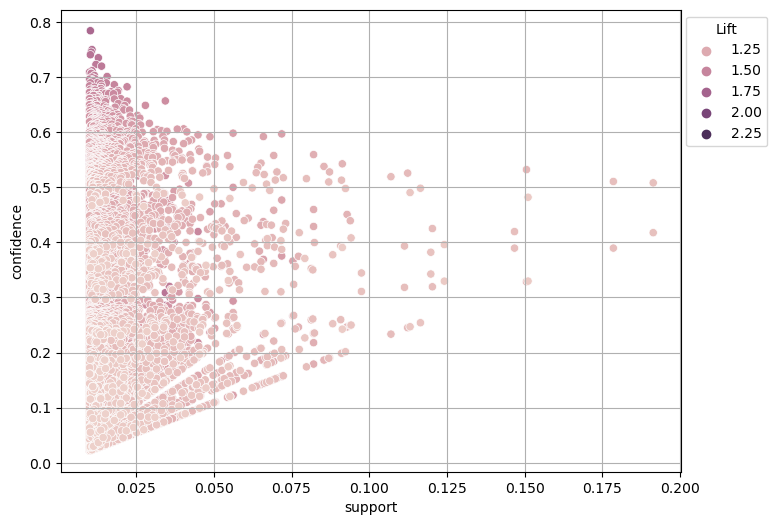

In [94]:
# Visualize the strengths of the rules
plt.figure(figsize = (8, 6))
sns.scatterplot(data = rules, x = 'support', y = 'confidence', hue = 'lift')
plt.legend(bbox_to_anchor = (1.15, 1), title = 'Lift')
plt.grid();